<a href="https://colab.research.google.com/github/Mirilh/BuenasPracticas/blob/nueba_branch/13_MachineLearning_DeepL1_Miri_CO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ACTIVIDAD LECCIÓN 13: Deep Learning I.

Alumno: Miriam López Hernández

Fecha: 08/23

### Actividad relacionada con la lección 13:
1. Instala adecuadamente las bibliotecas para Deep Learning TensorFlow y Keras. Si dispones de GPU, trata de realizar la instalación teniendo en cuenta ese aspecto. Comprueba mediante un script que la instalación ha sido completada de manera correcta.
2. Carga el conjunto de datos MNIST que trae la propia biblioteca Keras. Se trata de un conjunto de datos en el que las instancias están etiquetadas.
3. Diseña, implementa y prueba un modelo de Red Neuronal Profunda (DNN) que trate de resolver este problema de clasificación multiclase de imágenes.

In [2]:
# Importamos librerías a usar en este jupyter
import pandas as pd
import numpy as np
import random, time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, accuracy_score

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
# 1. Version
print(tf.__version__)
print(keras.__version__)

2.12.0
2.12.0


In [15]:
#  2. Carga el conjunto de datos MNIST que trae la propia biblioteca Keras.

from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

y_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
# Para saber cuantas neuronas de salida necesitamos tenemos que saber en cuantos grupos se esta clasificando las imagenes

num = len(set(y_train))

print(f"Número de clases: {num}")

Número de clases: 10


* A la hora de estandarizar me daba un error porque las imagenes del conjunto de datos es una matriz tridimensional, y nuestro modelo espera una bidimensional, se pasa a de 2D a 1D.

In [23]:
# Estandarizar los datos

scaler = StandardScaler()

# Primero redimensionamos la matriz 2D->1D
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Estructura:

- model = keras.Sequential([layers.Dense(Numero de neuronas, funcion de activacion, input_shape (solo en la 1 capa y se conecta directa con el nº de variables de entrada a la red:X_train.shape[1]

- layer.Dense -> Donde cada neurona está conectada con la capa anterior y siguiente
- layers.Dropout(0.3) -> Eliminamos algunas neuronas aleatoriamente para evitar el overfitting
- layer.Dense -> podemos cambiar la funcion de activacion en cada capa oculta


- model.compile (metodo por el que entrena pa mejorar la funcion de perdida que le decimos, y su optimizador - algorimo de propagacion
 y su metrica)

 En este caso hemos buscado cual sería una buena funcion de pérdida para este problema , y al se multiclase y de numeros enteros se usa 'Sparse Categorical Crossentropy' y como capa de salida: 'softmax'

In [37]:
# Modelo DNN para clasificacion

model = keras.Sequential([layers.Dense(100, activation = 'relu', input_shape = [X_train.shape[1]]),
                          layers.Dropout(0.3),
                          layers.Dense(100, activation = 'relu'),
                          layers.Dropout(0.3),
                          layers.Dense(100, activation = 'relu'),
                          layers.Dense(10, activation = 'softmax')])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

# Predeterminamos las epocas en 100, pero reduciremos si vemos que se sobrentrena , tambien cambiamos alguna funcion para ver si funciona mejor.
history = model.fit(X_train, y_train,
                   epochs = 100 , validation_split = 0.2)

# Creamos un DF en el que se almacena las metricas del entrenamiento y luego creamos una columna 'epoch' para ir sabiendo las epocas - iteraciones
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 100)               78500     
                                                                 
 dropout_16 (Dropout)        (None, 100)               0         
                                                                 
 dense_33 (Dense)            (None, 100)               10100     
                                                                 
 dropout_17 (Dropout)        (None, 100)               0         
                                                                 
 dense_34 (Dense)            (None, 100)               10100     
                                                                 
 dense_35 (Dense)            (None, 10)                1010      
                                                                 
Total params: 99,710
Trainable params: 99,710
Non-trai

In [38]:
# Saber como se llaman los keys para llamarlos en el grafico.
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


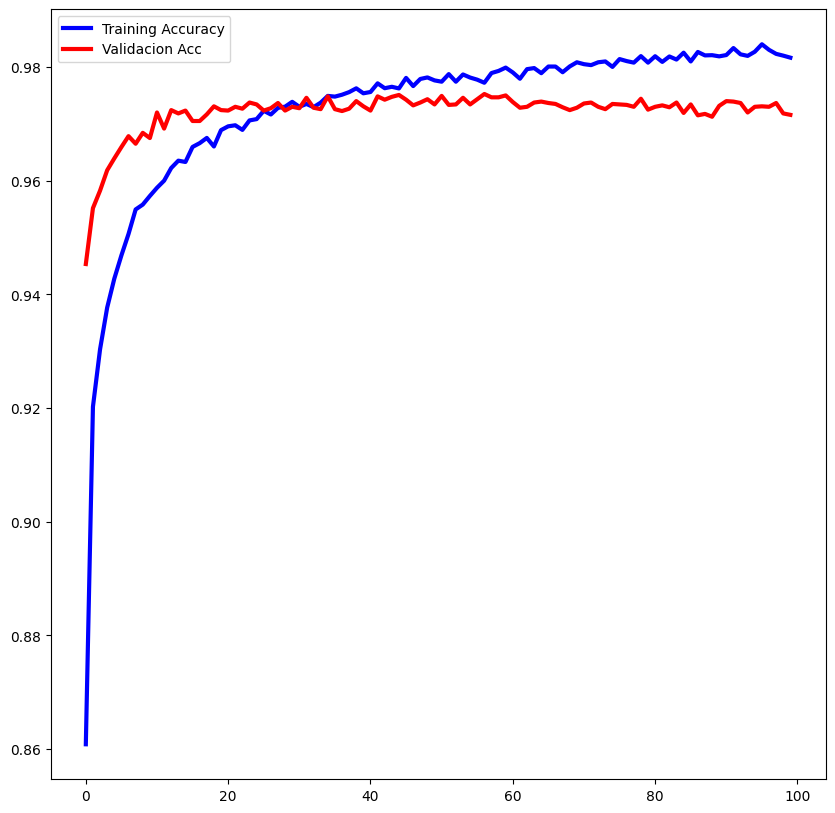

Acc: 0.9724


In [39]:
fig, ax = plt.subplots(figsize = (10,10))
num_epoch = model_history.shape[0]
ax.plot(np.arange(0, num_epoch), model_history['accuracy'],
           label = 'Training Accuracy', lw = 3, color = 'blue')

ax.plot(np.arange(0, num_epoch), model_history['val_accuracy'],
           label = 'Validacion Acc', lw = 3, color = 'red')

ax.legend()
plt.show()

loss, acc = model.evaluate(X_test, y_test, verbose = 0)
print('Acc:', round(acc, 4))

In [40]:
# Vamos a repetir cambiando un par de aspectos para ver como cambia y si entrena mejor, menos capas y distintas.

model = keras.Sequential([layers.Dense(200, activation = 'softmax', input_shape = [X_train.shape[1]]),
                          layers.Dropout(0.2),
                          layers.Dense(100, activation = 'relu'),
                          layers.Dropout(0.2),
                          layers.Dense(60, activation = 'relu'),
                          layers.Dense(10, activation = 'softmax')])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

# Bajamos el número de epocas a 50
history = model.fit(X_train, y_train,
                   epochs = 40 , validation_split = 0.2)

# Creamos un DF en el que se almacena las metricas del entrenamiento y luego creamos una columna 'epoch' para ir sabiendo las epocas - iteraciones
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 200)               157000    
                                                                 
 dropout_18 (Dropout)        (None, 200)               0         
                                                                 
 dense_37 (Dense)            (None, 100)               20100     
                                                                 
 dropout_19 (Dropout)        (None, 100)               0         
                                                                 
 dense_38 (Dense)            (None, 60)                6060      
                                                                 
 dense_39 (Dense)            (None, 10)                610       
                                                                 
Total params: 183,770
Trainable params: 183,770
Non-tr

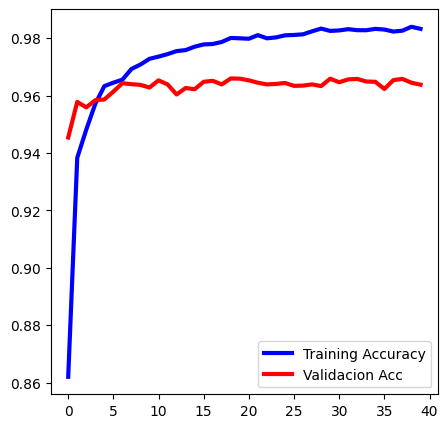

Acc: 0.9649


In [41]:
fig, ax = plt.subplots(figsize = (5,5))
num_epoch = model_history.shape[0]
ax.plot(np.arange(0, num_epoch), model_history['accuracy'],
           label = 'Training Accuracy', lw = 3, color = 'blue')

ax.plot(np.arange(0, num_epoch), model_history['val_accuracy'],
           label = 'Validacion Acc', lw = 3, color = 'red')

ax.legend()
plt.show()

loss, acc = model.evaluate(X_test, y_test, verbose = 0)
print('Acc:', round(acc, 4))

Parece que en este caso tras cambiar ALEATORIAMENTE para ver en prueba y error el accuracy que conseguimos es menor, entrena los datos de training consiguiendo un acc mejor más ráido pero a la hora de la validacion se ve como le afecta ese posible sobreentrenamiento y se obtiene 0.9649 frente al anterior 0.9724